In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [59]:
print(digits.images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [60]:
print(digits.target[2])

2


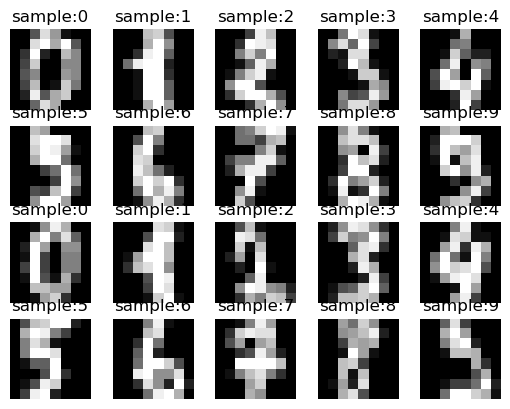

In [61]:
images_and_labels=list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('sample:%i'%label)

In [62]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [63]:
x=digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

In [65]:
model=nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)

In [66]:
X=torch.tensor(x, dtype=torch.float32)
Y=torch.tensor(y, dtype=torch.int64)

In [67]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [68]:
loss_list=[]
for epoch in range(1000):
    optimizer.zero_grad()
    y_hat=model(X)
    loss=loss_fn(y_hat,Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch:',epoch, 'Loss:',loss.item())

Epoch: 0 Loss: 2.642401933670044
Epoch: 100 Loss: 0.24665148556232452
Epoch: 200 Loss: 0.0728023499250412
Epoch: 300 Loss: 0.03156977519392967
Epoch: 400 Loss: 0.01599416323006153
Epoch: 500 Loss: 0.00919423345476389
Epoch: 600 Loss: 0.005749079864472151
Epoch: 700 Loss: 0.003865985432639718
Epoch: 800 Loss: 0.0027545883785933256
Epoch: 900 Loss: 0.0020509841851890087


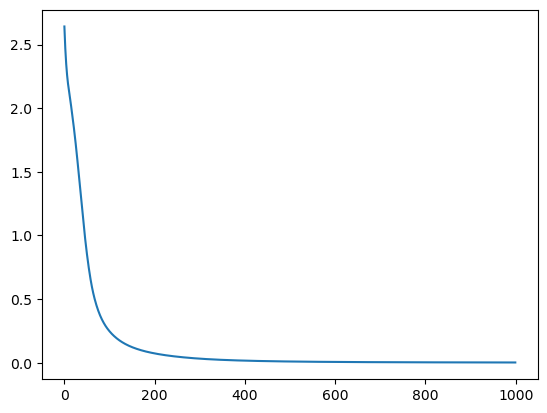

In [69]:
plt.plot(loss_list)

In [72]:
pred=model(X[[0]])
print(torch.max(pred.data,0))
print(Y[0])

torch.return_types.max(
values=tensor([ 20.1132, -19.3380,  -6.5695, -12.9667,   0.5660,  -2.2539,   1.8744,
          0.6439,  -5.1633,  -4.7535]),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
tensor(0)
